# 1. GEREKLİLİKLERİN YÜKLENMESİ VE AKTARILMASI

In [1]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116 #Pytorch sürümü yüklenmesi

ERROR: Invalid requirement: '#Pytorch': Expected package name at the start of dependency specifier
    #Pytorch
    ^


In [ ]:
!git clone https://github.com/ultralytics/yolov5 # yolov5 modelinin yüklenmesi

In [ ]:
!cd yolov5 & pip install -r requirements.txt  #yolov5 kullanılması için gerekli olan kütüphanelerin yüklenmesi 

In [13]:
import torch                                    #KÜTÜPHANELERİN İMPORT EDİLMESİ  
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. YOLO MODELİNİN YÜKLENMESİ

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')    #YOLOV5 HAZIR MODELİNİN YÜKLENMESİ 

In [ ]:
model

# 3. RESİMLERDEN TESPİT YAPMA

In [ ]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'
# İNTERNETTEN ALINAN RESMİN URL'SİNİN 'img' ADLI DEĞİŞKENE ATANMASI

In [ ]:
results = model(img)    #MODELE RESMİN URLSİNİN VERİLMESİ VE SONUCUN YAZDIRILMASI 
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

# 4. GERÇEK ZAMANLI TESPİT YAPMA

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # TESPİT YAPILMASI  
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. -----------------------CUSTOM MODEL OLUŞTURMA------------------------------------

In [14]:
import uuid   # Benzersiz tanımlayıcı
import os
import time

In [11]:
IMAGES_PATH = os.path.join('data', 'images') 
labels = ['UYANIK', 'YORGUN']
number_imgs = 20

# 6. DAHİLİ KAMERA İLE RESİMLERİN TOPLANMASI 

In [12]:
cap = cv2.VideoCapture(0)
# Etiketler arasında geçiş yap
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Görüntü aralığında döngü
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam
        ret, frame = cap.read()
        
        # Görüntü yolunu adlandırma
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Görüntüyü dosyaya yazar 
        cv2.imwrite(imgname, frame)
        
        # Ekrana işleme
        cv2.imshow('Image Collection', frame)
        
        # Yakalamalar arasında 2 saniye gecikme
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

# 7. 'labelImg' ADLI YAZILIMIN YÜKLENMESİ VE RESİMLERİN ETİKETLENMESİ

In [ ]:
!git clone https://github.com/tzutalin/labelImg  #GİTHUB'DAN KLONLAMA

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

# 8. ÖZEL MODELİN ETİKETLENMİŞ RESİMLER İLE EĞİTİLMESİ

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 100 --data dataset.yml --weights yolov5s.pt --workers 4
#EĞİTİMİN BAŞLATILMASI 

# 9. ÖZEL MODELİN YÜKLENMESİ

In [1]:
import torch                                    #KÜTÜPHANELERİN İMPORT EDİLMESİ  
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid   # Benzersiz tanımlayıcı
import os
import time

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)
#SON GÜNCEL AĞIRLIKLARI KULLANARAK ÖZEL MODELİN YÜKLENMESİ 

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\AsusPc/.cache\torch\hub\master.zip
YOLOv5  2024-1-2 Python-3.10.8 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


# 10. ÖZEL MODEL İLE RESİMDEN TESPİT YAPMA

In [19]:
img = os.path.join('data', 'images', 'UYANIK.7488fcc6-806b-11ed-bec3-b06ebf11babd.jpg') #BİLGİSAYARDAKİ RESİMDEN TEST EDİLMESİ

In [20]:
results = model(img)

In [21]:
results.print()

image 1/1: 480x640 1 UYANIK
Speed: 35.9ms pre-process, 179.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


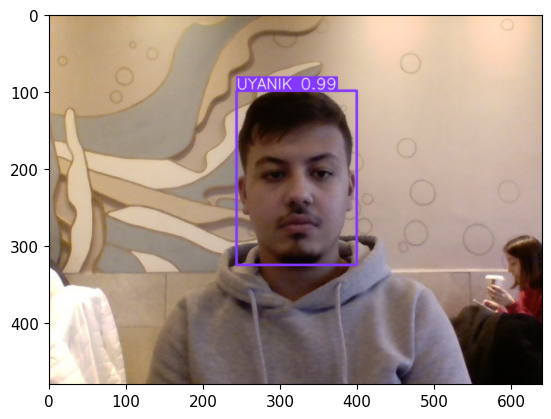

In [22]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# 11. ÖZEL MODEL İLE GERÇEK ZAMANLI TESPİT YAPILMASI

In [3]:
import cv2
import numpy as np
import pygame
import time
import threading
import torch

# Assuming you have a YOLO model loaded as 'model'
# You may need to import the YOLO model and its dependencies

def play_alarm_sound():
    pygame.mixer.init()
    sound = pygame.mixer.Sound('alarm.wav')
    sound.play()
    while pygame.mixer.get_busy():
        pygame.time.Clock().tick(1)
    pygame.mixer.quit()

def alarm_thread():
    global alarm_baslangic_zamani
    alarm_baslangic_zamani = time.time()
    while True:
        play_alarm_sound()
        print("Alarm çalıyor... Dikkat! Yorgunsunuz!")
        time.sleep(1)
        if not cap.isOpened() or uyanik_durumu_algildi:
            break

# 2. Video Yakalama Başlatın
cap = cv2.VideoCapture(0)

# 3. Diğer Parametreleri Ayarlayın
skip_frames = 1  # Her 5 kareyi atla (gerektiğinde değiştirin)
count = 0

# Yorgunluk durumunu izlemek için bir değişken ata
yorgunluk_frame_sayisi = 0
yorgunluk_esik_degeri = 20  # Belirli bir sayıda ardışık yorgunluk durumu algılandığında alarmı tetikle

# Alarm durumunu kontrol etmek için bir değişken ata
alarm_aktif = False

# Alarm başlangıç zamanını takip etmek için bir değişken ata
alarm_baslangic_zamani = 0

# 4. Ana Döngü
while cap.isOpened():
    ret, frame = cap.read()

    # Her skip_frames karesini atla
    if count % skip_frames == 0:
        # Varsayılan olarak 'model' olarak yüklenmiş bir YOLO modeliniz olduğunu varsayalım
        results = model(frame)
        names = model.names

        # Nesne Tespitini Gerçekleştirin
        with torch.no_grad():  # Değerlendirme modunda çalıştır
            detections = results.xyxy[0]

            yorgun_durumu_algildi = False  # Yorgun durumu algılandı mı?
            uyanik_durumu_algildi = False  # Uyanık durumu algılandı mı?

            for detection in detections:
                label = names[int(detection[-1])]

                if label == 'YORGUN':
                    yorgunluk_frame_sayisi += 1

                    if yorgunluk_frame_sayisi >= yorgunluk_esik_degeri and not alarm_aktif:
                        # Alarm fonksiyonunu ayrı bir thread üzerinde çalıştır
                        alarm_thread_instance = threading.Thread(target=alarm_thread)
                        alarm_thread_instance.start()

                        # Yorgun durumu algılandı
                        yorgun_durumu_algildi = True

                        # Alarm aktif durumunu güncelle
                        alarm_aktif = True

                elif label == 'UYANIK':
                    uyanik_durumu_algildi = True

            # Eğer uyanık durumu algılandıysa yorgunluk frame sayısını sıfırla
            if uyanik_durumu_algildi:
                yorgunluk_frame_sayisi = 0
                alarm_aktif = False  # Uyanık durumu algılandığında veya eşik değeri aşıldığında alarmı kapat

            # Eğer alarm aktifse ve belirli bir süre geçtiyse "Dikkat! Yorgunsunuz!" yazısını göster
            if yorgunluk_frame_sayisi >= yorgunluk_esik_degeri:
                cv2.putText(frame, "Dikkat! Yorgunsunuz!", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

            # Her durumda frame sayısını göster
            message = f"Yorgunluk orani: {yorgunluk_frame_sayisi}"
            if yorgunluk_frame_sayisi > yorgunluk_esik_degeri:
                message = f"Yorgunluk orani: {yorgunluk_esik_degeri}"

            cv2.putText(frame, message, (60, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
            if yorgunluk_frame_sayisi < yorgunluk_esik_degeri:
                # Çerçeve kalınlığını belirle, yorgunluk arttıkça kalınlığı artır
                frame_thickness = int(1 + 10 * np.exp(0.1 * yorgunluk_frame_sayisi))
                # Çerçeve rengi: (B, G, R), burada kırmızı renk
                frame_color = (0, 0, 255)
                # Çerçeve ekle
                cv2.rectangle(frame, (0, 0), (frame.shape[1], frame.shape[0]), frame_color, frame_thickness)
            if yorgunluk_frame_sayisi > yorgunluk_esik_degeri:
                frame_thickness = int(1 + 10 * np.exp(0.1 * yorgunluk_esik_degeri))
                # Çerçeve rengi: (B, G, R), burada kırmızı renk
                frame_color = (0, 0, 255)
                # Çerçeve ekle
                cv2.rectangle(frame, (0, 0), (frame.shape[1], frame.shape[0]), frame_color, frame_thickness)

    # 7. Sonuçları Göster
    cv2.imshow('YOLO', np.squeeze(results.render()))

    count += 1

    # 8. Çıkış İşlemi
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# 9. Temizleme
cap.release()
cv2.destroyAllWindows()

#deneme 4 

ModuleNotFoundError: No module named 'cv2'

In [4]:
import cv2
import numpy as np
import pygame
import time
import threading
import torch

# Assuming you have a YOLO model loaded as 'model'
# You may need to import the YOLO model and its dependencies

def play_alarm_sound():
    pygame.mixer.init()
    sound = pygame.mixer.Sound('alarm.wav')
    sound.play()
    while pygame.mixer.get_busy():
        pygame.time.Clock().tick(1)
    pygame.mixer.quit()

def alarm_thread():
    global alarm_baslangic_zamani
    alarm_baslangic_zamani = time.time()
    while True:
        play_alarm_sound()
        print("Alarm çalıyor... Dikkat! Yorgunsunuz!")
        time.sleep(1)
        if not cap.isOpened() or uyanik_durumu_algildi:
            break

# 2. Video Yakalama Başlatın
cap = cv2.VideoCapture(0)

# 3. Diğer Parametreleri Ayarlayın
skip_frames = 1  # Her 5 kareyi atla (gerektiğinde değiştirin)
count = 0

# Yorgunluk durumunu izlemek için bir değişken ata
yorgunluk_frame_sayisi = 0
yorgunluk_esik_degeri = 20  # Belirli bir sayıda ardışık yorgunluk durumu algılandığında alarmı tetikle

# Alarm durumunu kontrol etmek için bir değişken ata
alarm_aktif = False

# Alarm başlangıç zamanını takip etmek için bir değişken ata
alarm_baslangic_zamani = 0

# 4. Ana Döngü
while cap.isOpened():
    ret, frame = cap.read()

    # Her skip_frames karesini atla
    if count % skip_frames == 0:
        # Varsayılan olarak 'model' olarak yüklenmiş bir YOLO modeliniz olduğunu varsayalım
        results = model(frame)
        names = model.names

        # Nesne Tespitini Gerçekleştirin
        detections = results.xyxy[0]

        yorgun_durumu_algildi = False  # Yorgun durumu algılandı mı?
        uyanik_durumu_algildi = False  # Uyanık durumu algılandı mı?

        for detection in detections:
            label = names[int(detection[-1])]

            if label == 'YORGUN':
                yorgunluk_frame_sayisi += 1

                if yorgunluk_frame_sayisi >= yorgunluk_esik_degeri and not alarm_aktif:
                    # Alarm fonksiyonunu ayrı bir thread üzerinde çalıştır
                    alarm_thread_instance = threading.Thread(target=alarm_thread)
                    alarm_thread_instance.start()

                    # Yorgun durumu algılandı
                    yorgun_durumu_algildi = True

                    # Alarm aktif durumunu güncelle
                    alarm_aktif = True

            elif label == 'UYANIK':
                uyanik_durumu_algildi = True

        # Eğer uyanık durumu algılandıysa yorgunluk frame sayısını sıfırla
        if uyanik_durumu_algildi:
            yorgunluk_frame_sayisi = 0
            alarm_aktif = False  # Uyanık durumu algılandığında veya eşik değeri aşıldığında alarmı kapat

        # Eğer alarm aktifse ve belirli bir süre geçtiyse "Dikkat! Yorgunsunuz!" yazısını göster
        if yorgunluk_frame_sayisi >= yorgunluk_esik_degeri:
            cv2.putText(frame, "Dikkat! Yorgunsunuz!", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Her durumda frame sayısını göster
        message = f"Yorgunluk orani: {yorgunluk_frame_sayisi}"
        if yorgunluk_frame_sayisi > yorgunluk_esik_degeri:
            message = f"Yorgunluk orani: {yorgunluk_esik_degeri}"

        cv2.putText(frame, message, (60, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        if yorgunluk_frame_sayisi < yorgunluk_esik_degeri:
            # Çerçeve kalınlığını belirle, yorgunluk arttıkça kalınlığı artır
            frame_thickness = int(1 + 10 * np.exp(0.1 * yorgunluk_frame_sayisi))
            # Çerçeve rengi: (B, G, R), burada kırmızı renk
            frame_color = (0, 0, 255)
            # Çerçeve ekle
            cv2.rectangle(frame, (0, 0), (frame.shape[1], frame.shape[0]), frame_color, frame_thickness)
        if yorgunluk_frame_sayisi > yorgunluk_esik_degeri:
            frame_thickness = int(1 + 10 * np.exp(0.1 * yorgunluk_esik_degeri))
            # Çerçeve rengi: (B, G, R), burada kırmızı renk
            frame_color = (0, 0, 255)
            # Çerçeve ekle
            cv2.rectangle(frame, (0, 0), (frame.shape[1], frame.shape[0]), frame_color, frame_thickness)

    # 7. Sonuçları Göster
    cv2.imshow('YOLO', np.squeeze(results.render()))

    count += 1

    # 8. Çıkış İşlemi
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# 9. Temizleme
cap.release()
cv2.destroyAllWindows()

#deneme5  threshold yok ama skip frame dogru calısıyor 

pygame 2.5.2 (SDL 2.28.3, Python 3.10.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
Alarm çalıyor... Dikkat! Yorgunsunuz!
Alarm çalıyor... Dikkat! Yorgunsunuz!
Alarm çalıyor... Dikkat! Yorgunsunuz!
Alarm çalıyor... Dikkat! Yorgunsunuz!


In [ ]:
import cv2
import numpy as np
import pygame
import time
import threading
import torch

# Assuming you have a YOLO model loaded as 'model'
# You may need to import the YOLO model and its dependencies

def play_alarm_sound():
    pygame.mixer.init()
    sound = pygame.mixer.Sound('alarm.wav')
    sound.play()
    while pygame.mixer.get_busy():
        pygame.time.Clock().tick(1)
    pygame.mixer.quit()

def alarm_thread():
    global alarm_baslangic_zamani
    alarm_baslangic_zamani = time.time()
    while True:
        play_alarm_sound()
        print("Alarm çalıyor... Dikkat! Yorgunsunuz!")
        time.sleep(1)
        if not cap.isOpened() or uyanik_durumu_algildi:
            break

# 2. Video Yakalama Başlatın
cap = cv2.VideoCapture(0)

# 3. Diğer Parametreleri Ayarlayın
skip_frames = 1  # Her 5 kareyi atla (gerektiğinde değiştirin)
count = 0

# Yorgunluk durumunu izlemek için bir değişken ata
yorgunluk_frame_sayisi = 0
yorgunluk_esik_degeri = 20  # Belirli bir sayıda ardışık yorgunluk durumu algılandığında alarmı tetikle

# Alarm durumunu kontrol etmek için bir değişken ata
alarm_aktif = False

# Alarm başlangıç zamanını takip etmek için bir değişken ata
alarm_baslangic_zamani = 0

# Nesne tespiti için doğruluk eşiği (threshold)
confidence_threshold = 0.7

# 4. Ana Döngü
while cap.isOpened():
    ret, frame = cap.read()

    # Her skip_frames karesini atla
    if count % skip_frames == 0:
        # Varsayılan olarak 'model' olarak yüklenmiş bir YOLO modeliniz olduğunu varsayalım
        results = model(frame)
        names = model.names

        # Nesne Tespitini Gerçekleştirin
        detections = results.xyxy[0]

        yorgun_durumu_algildi = False  # Yorgun durumu algılandı mı?
        uyanik_durumu_algildi = False  # Uyanık durumu algılandı mı?

        for detection in detections:
            label = names[int(detection[-1])]
            confidence = float(detection[4])

            # Sadece belirli bir doğruluk eşiğinin üzerindeki tespitleri işle
            if confidence >= confidence_threshold:
                if label == 'YORGUN':
                    yorgunluk_frame_sayisi += 1

                    if yorgunluk_frame_sayisi >= yorgunluk_esik_degeri and not alarm_aktif:
                        # Alarm fonksiyonunu ayrı bir thread üzerinde çalıştır
                        alarm_thread_instance = threading.Thread(target=alarm_thread)
                        alarm_thread_instance.start()

                        # Yorgun durumu algılandı
                        yorgun_durumu_algildi = True

                        # Alarm aktif durumunu güncelle
                        alarm_aktif = True

                elif label == 'UYANIK':
                    uyanik_durumu_algildi = True

        # Eğer uyanık durumu algılandıysa yorgunluk frame sayısını sıfırla
        if uyanik_durumu_algildi:
            yorgunluk_frame_sayisi = 0
            alarm_aktif = False  # Uyanık durumu algılandığında veya eşik değeri aşıldığında alarmı kapat

        # Eğer alarm aktifse ve belirli bir süre geçtiyse "Dikkat! Yorgunsunuz!" yazısını göster
        if yorgunluk_frame_sayisi >= yorgunluk_esik_degeri:
            cv2.putText(frame, "Dikkat! Yorgunsunuz!", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Her durumda frame sayısını göster
        message = f"Yorgunluk orani: {yorgunluk_frame_sayisi}"
        if yorgunluk_frame_sayisi > yorgunluk_esik_degeri:
            message = f"Yorgunluk orani: {yorgunluk_esik_degeri}"

        cv2.putText(frame, message, (60, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        if yorgunluk_frame_sayisi < yorgunluk_esik_degeri:
            # Çerçeve kalınlığını belirle, yorgunluk arttıkça kalınlığı artır
            frame_thickness = int(1 + 10 * np.exp(0.1 * yorgunluk_frame_sayisi))
            # Çerçeve rengi: (B, G, R), burada kırmızı renk
            frame_color = (0, 0, 255)
            # Çerçeve ekle
            cv2.rectangle(frame, (0, 0), (frame.shape[1], frame.shape[0]), frame_color, frame_thickness)
        if yorgunluk_frame_sayisi > yorgunluk_esik_degeri:
            frame_thickness = int(1 + 10 * np.exp(0.1 * yorgunluk_esik_degeri))
            # Çerçeve rengi: (B, G, R), burada kırmızı renk
            frame_color = (0, 0, 255)
            # Çerçeve ekle
            cv2.rectangle(frame, (0, 0), (frame.shape[1], frame.shape[0]), frame_color, frame_thickness)

    # 7. Sonuçları Göster
    cv2.imshow('YOLO', np.squeeze(results.render()))

    count += 1

    # 8. Çıkış İşlemi
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# 9. Temizleme
cap.release()
cv2.destroyAllWindows()

# deneme 6 threshold var 

In [3]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# düz tespit işlemi yapıyor. 